In [1]:
def write_array(file, array):
    with open(file, 'w') as f:
        for item in array:
            f.write("%s\n" % str(item))
            
def write_array_other(file, array):
    string_array = [str(x) for x in array]
    with open(file, 'w') as f:
        for item in string_array:
            f.write("%s\n" % item)

In [2]:
import random

In [3]:
random_values = [random.uniform(0, 1) for x in range(3000000)]

In [4]:
write_array_other("test.txt", random_values)

In [5]:
action_buffer = []

for i in range(1000):
    action_buffer.append(random.uniform(0, 1))
    

In [6]:
from matplotlib import pyplot as plt

def take_sample(buffer, f):
    uniformVal = random.uniform(0, 1)
    index = int(f(uniformVal) * len(buffer))
    return buffer[index]

def take_avg(buffer, f, count):
    avg = 0

    for i in range(count):
        avg += take_sample(buffer, f)
        
    return avg / count


0.4957741280868563


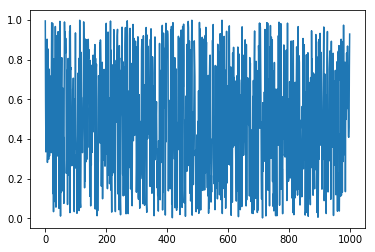

In [7]:
plt.plot(action_buffer)

def uniform(x):
    return x


print(take_avg(action_buffer, uniform, 10000))


0.6613285894472414


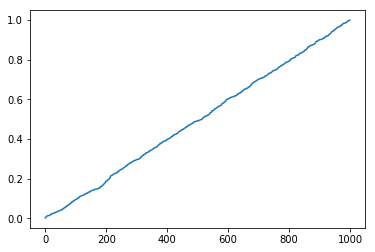

In [8]:
import math

action_buffer.sort(key=lambda x: x)

def diagonal(x):
    return math.sqrt(x)

plt.plot(action_buffer)

print(take_avg(action_buffer, diagonal, 10000))

<Figure size 432x288 with 0 Axes>

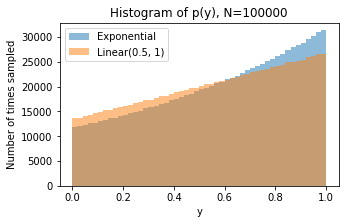

In [16]:

def exp(x):
    return math.log(x * math.e - x + 1)

def diagab(x, a, b):
    return (-a + math.sqrt(a*a + x*b*b - x*a*a)) / (b - a)

figure = plt.figure()


exp_indexes = []
diag_indexes = []
diagab_indexes = []

for x in range(1000000):
    uniform = random.uniform(0, 1)
    
    exp_indexes.append(exp(uniform))
    diag_indexes.append(diagonal(uniform))
    diagab_indexes.append(diagab(uniform, 0.5, 1))

# x = plt.hist(exp_indexes, bins=50)


figure = plt.figure(figsize=(5, 3))
plt.title('Histogram of p(y), N=100000');
plt.xlabel('y')
plt.ylabel('Number of times sampled')
x = plt.hist(exp_indexes, bins=50, alpha=0.5, label="Exponential")
x = plt.hist(diagab_indexes, bins=50, alpha=0.5, label="Linear(0.5, 1)")
plt.legend()

# figure = plt.figure()
# x = plt.hist(diagab_indexes, bins=50)
